## Importing Libraries.

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Constants.

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## Generating a tf.data.Dataset from image files in a directory.

<pre class="lang-py tfo-signature-link" translate="no" dir="ltr" is-upgraded=""><code dir="ltr"><span class="pln">tf</span><span class="pun">.</span><span class="pln">keras</span><span class="pun">.</span><span class="pln">utils</span><span class="pun">.</span><span class="pln">image_dataset_from_directory</span><span class="pun">(</span><span class="pln"><br>&nbsp; &nbsp; directory</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; labels</span><span class="pun">=</span><span class="str">'inferred'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; label_mode</span><span class="pun">=</span><span class="str">'int'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; class_names</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; color_mode</span><span class="pun">=</span><span class="str">'rgb'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; batch_size</span><span class="pun">=</span><span class="lit">32</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; image_size</span><span class="pun">=(</span><span class="lit">256</span><span class="pun">,</span><span class="pln"> </span><span class="lit">256</span><span class="pun">),</span><span class="pln"><br>&nbsp; &nbsp; shuffle</span><span class="pun">=</span><span class="kwd">True</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; seed</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; validation_split</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; subset</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; interpolation</span><span class="pun">=</span><span class="str">'bilinear'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; follow_links</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; crop_to_aspect_ratio</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; </span><span class="pun">**</span><span class="pln">kwargs<br></span><span class="pun">)</span><span class="pln"><br></span></code></pre>

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True, #Randomly shuffle the images and load them.
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


## Class Names.

In [4]:
#The class names are derived from the names of the folders in the directory specified.
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Dataset Length.

In [5]:
len(dataset)
#Actual length is 68 x 32 (68 Batches of size 32 each).

68

## Display Images.

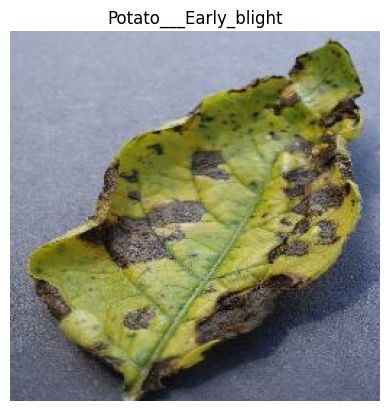

In [6]:
#dataset.take(1) == Take first Batch.

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

## Splitting the Dataset.

In [7]:
# 80% ==> training.
# 20% ==> 10% validation, 10% test.

## Calculate the size of the Training dataset from Total Length of Dataset.

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

## Take 80% of the Dataset Length for Training.

In [9]:
# Take first 54 batches (Each batch is of size 32).
# Where 54 = 80% of Dataset Length.
train_ds = dataset.take(54)
len(train_ds)

54

## Take the Remaining 20% of the total Dataset Length as Testing Data.

In [10]:
#dataset.skip(54) == skip the first 54 and take the rest.
test_ds = dataset.skip(54)
len(test_ds)

14

## Now split the Test data (20% of the Total Data) into Validation (10%) and Test(10%) data.

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
#Therefore Validation Data (val_ds) == first 6 Samples.
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
#Let test_ds take the remaining samples after val_ds has taken 6%.
test_ds = test_ds.skip(6)
len(test_ds)

8

## We can also make a Function that partitions the Dataset automatically.

In [14]:
#The initial values given in the function parameters serve as default values incase the function call doesnt give the values.
def get_dataset_partitions_tf (ds , train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    #Total size of the dataset passed as an arguement.
    ds_size = len(ds)
    
    #If the function call was made with boolean shuffle = True.
    #Then we shuffle the Dataset to obtain different results, (NB: seed will have to be changed!).
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size) #int to get rid of decimals.
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size) #Take first 80% as Training Data.
    
    #Then skip 80% that has been taken as training data, then out of the remaining 20% take 10% which is validation data.
    val_ds = ds.skip(train_size).take(val_size)
    
    #Now skip the 10% that was taken as validation data and use the rest as testing data.
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
#Lets test the function by calling it using the name of our Dataset (ourdatasetname == dataset).
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

print("Training Dataset = "+str(len(train_ds))+"\n","Validation Dataset = "+str(len(val_ds))+"\n","Testing Dataset = "+str(len(test_ds))+"\n","Size of Dataset = "+str(len(dataset)))

Training Dataset = 54
 Validation Dataset = 6
 Testing Dataset = 8
 Size of Dataset = 68


## Now we do caching, reading the images from the Disk and storing them in memory.

In [16]:
#This improves the performance of the Pipeline.
#The following code lets tensorflow decide how many batches to load when GPU is training.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Pre-processing Layer

In [17]:
#Scaling the numpy array (Pre-Processing is usually the first step in any image processing).
#The numpy array was an RGB scale, so we divide by 255 to get values between 0 and 1.
resize_and_rescale = tf.keras.Sequential([
    #Resize so that during prediction any image that is not 256*256 will be resized
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation Layer

In [18]:
#And for Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])

## Building the Model (CNN)

In [19]:
#Whenever you feed in an image, first do pre-processing, then data augmentation.
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #After each (convolution+ReLU) comes Pooling and finally Flattening to an Array of neurons.
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    #Last Layer has 3 Neurons
    #Softmax activation function will normalize the probability of our classes
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

## Model Summary

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

## Compliling the Model

In [21]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training the Model

In [22]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    #Validation data is used in each Epoch to track accuracy during training!
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 39s 492ms/step - loss: 0.9029 - accuracy: 0.4890 - val_loss: 0.8085 - val_accuracy: 0.6458
Epoch 2/50
54/54 [==============================] - 25s 456ms/step - loss: 0.6339 - accuracy: 0.7193 - val_loss: 0.4074 - val_accuracy: 0.8385
Epoch 3/50
54/54 [==============================] - 25s 457ms/step - loss: 0.4135 - accuracy: 0.8368 - val_loss: 0.2660 - val_accuracy: 0.9010
Epoch 4/50
54/54 [==============================] - 25s 455ms/step - loss: 0.2758 - accuracy: 0.8843 - val_loss: 0.3046 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 25s 455ms/step - loss: 0.2557 - accuracy: 0.9080 - val_loss: 0.1618 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 25s 455ms/step - loss: 0.2050 - accuracy: 0.9178 - val_loss: 0.2271 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 25s 455ms/step - loss: 0.1976 - accuracy: 0.9282 - val_loss: 0.1459 - val_accuracy: 0.9375

## Evaluate the model on Data it has never seen.

In [23]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 143ms/step - loss: 0.0885 - accuracy: 0.9766


In [24]:
#model.evaluate returns a python list with first element as loss and second as accuracy.
scores

[0.08852788060903549, 0.9765625]

## Checking How the training went using History

In [25]:
#history is keras.callbacks.History
history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
#The Keys in the History dictionary return lists of values during training.
history.history['accuracy']

[0.48900464177131653,
 0.7193287014961243,
 0.8368055820465088,
 0.8842592835426331,
 0.9079861044883728,
 0.9178240895271301,
 0.9282407164573669,
 0.9456018805503845,
 0.9513888955116272,
 0.9473379850387573,
 0.9635416865348816,
 0.9565972089767456,
 0.9658564925193787,
 0.9565972089767456,
 0.9710648059844971,
 0.9594907164573669,
 0.9768518805503845,
 0.9704861044883728,
 0.9878472089767456,
 0.9797453880310059,
 0.9803240895271301,
 0.9797453880310059,
 0.9791666865348816,
 0.9901620149612427,
 0.9756944179534912,
 0.984375,
 0.9907407164573669,
 0.9936342835426331,
 0.9918981194496155,
 0.9890046119689941,
 0.9878472089767456,
 0.9820601940155029,
 0.9832175970077515,
 0.9861111044883728,
 0.9953703880310059,
 0.9809027910232544,
 0.9866898059844971,
 0.9878472089767456,
 0.9878472089767456,
 0.9820601940155029,
 0.9756944179534912,
 0.9855324029922485,
 0.9901620149612427,
 0.9959490895271301,
 0.9913194179534912,
 0.9918981194496155,
 0.9895833134651184,
 0.9890046119689941,
 

In [27]:
#We can then store the lists from the history dictionary and use them to make plots.
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

## Matplotlib Plots of the History Data

Text(0.5, 1.0, 'Training and Validation Loss')

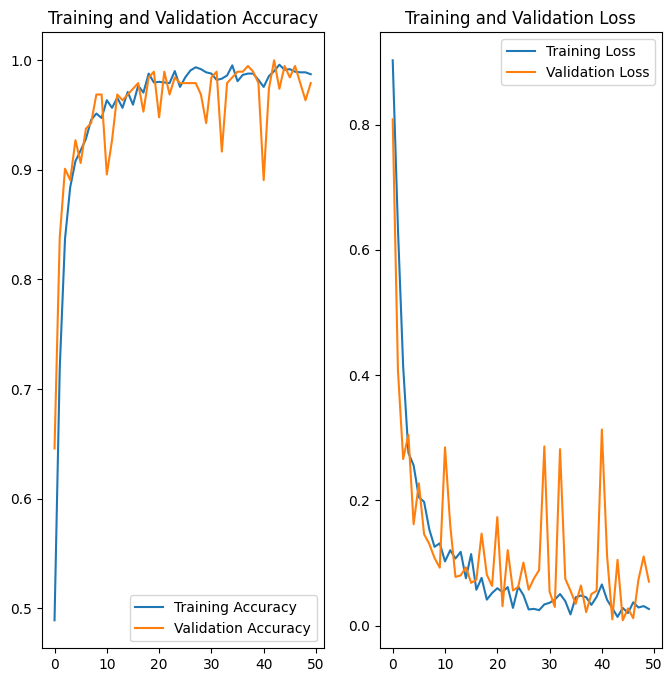

In [28]:
#Matplot lib plots can be used to determine how many EPOCHS were required to give the best accuracy.
#The Accuracy Chart
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

#The loss Chart
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

## Testing The model

First image to predict
Actual label: Potato___Early_blight
Predicted label: Potato___Early_blight


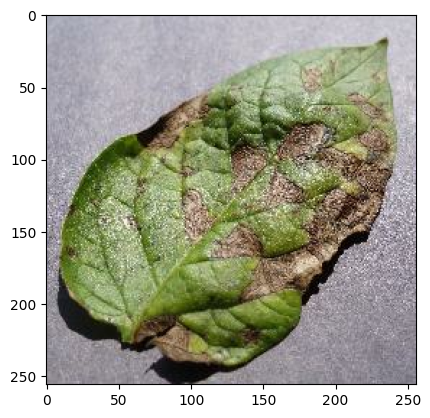

In [30]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    # model.predict is fed 32 images, it then returns a list of confidence values.  
    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

## Step by Step explanation of numpy.argmax Function

In [31]:
#Batch 
batch_prediction

array([[9.9999988e-01, 6.0444037e-08, 2.7639054e-20],
       [9.9999881e-01, 1.2135937e-06, 2.6233009e-17],
       [8.7806393e-07, 9.9999309e-01, 6.1330529e-06],
       [2.2589786e-04, 9.9977416e-01, 5.4834498e-10],
       [3.7991926e-02, 9.6200782e-01, 1.8395097e-07],
       [1.1287679e-04, 9.9942195e-01, 4.6518960e-04],
       [9.9970335e-01, 2.9661329e-04, 2.0980709e-13],
       [9.9998629e-01, 1.3738937e-05, 2.8072895e-17],
       [9.9999964e-01, 3.1299734e-07, 6.0900160e-17],
       [3.2093882e-04, 9.9967766e-01, 1.4402619e-06],
       [9.9878699e-01, 1.2130257e-03, 3.7887720e-15],
       [9.9999940e-01, 6.3921442e-07, 1.5141890e-19],
       [1.7594377e-04, 9.9982411e-01, 2.0175513e-08],
       [1.3170306e-07, 9.9984765e-01, 1.5218515e-04],
       [8.2643927e-14, 1.3282136e-05, 9.9998677e-01],
       [9.9999976e-01, 2.2553645e-07, 5.9548386e-19],
       [9.9999964e-01, 3.3297587e-07, 1.8541985e-18],
       [1.0420040e-05, 9.9998963e-01, 1.2570506e-08],
       [1.2252652e-07, 8.089

In [32]:
batch_prediction[0]

array([9.9999988e-01, 6.0444037e-08, 2.7639054e-20], dtype=float32)

In [34]:
#Returns the index of the element with the highest confidence (accuracy).
np.argmax(batch_prediction[0])

0

In [35]:
#The index is then fed to array class_names to give the name of the class with the highest confidence.
class_names [np.argmax(batch_prediction[0])]

'Potato___Early_blight'

## Making a prediction Function that has model and image as parameters and returns predicted class and confidence.

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a Batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    
    #Round up to 2 decimal places
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

## Using Matplot Lib to display used image, Accuracy (confidence) and actual class.

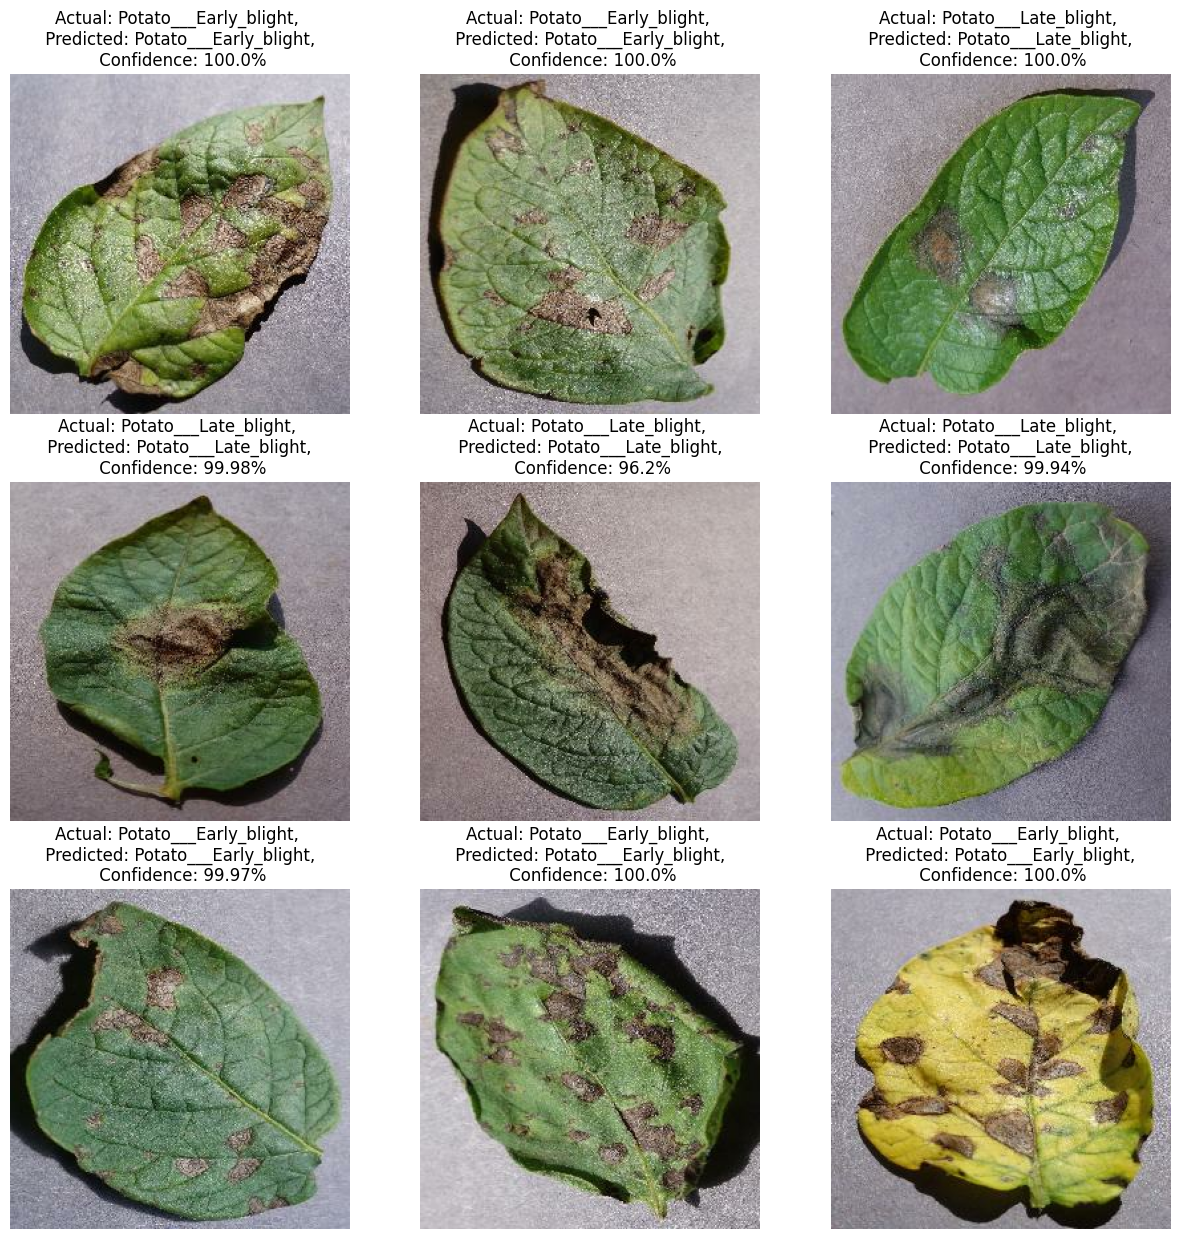

In [45]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")

## Exporting the model